In [2]:
#IMPORTING PACKAGES AND MODULES 

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

from imblearn.over_sampling import ADASYN

from collections import Counter

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics


In [3]:
#LOADING DATASET

data=pd.read_csv("train.csv")
df1=pd.read_csv("test_1.csv")
data.head()

,Region,State,Area,City,Consumer_profile,Product_category,Product_type,AC_1001_Issue,AC_1002_Issue,AC_1003_Issue,TV_2001_Issue,TV_2002_Issue,TV_2003_Issue,Claim_Value,Service_Centre,Product_Age,Purchased_from,Call_details,Purpose,Fraud
0,North East,Assam,Rural,Guwhati,Personal,Household,AC,0,1,2,0,0,0,4474.0,12,202,Manufacturer,30.0,Claim,0
1,East,Delhi,Urban,New Delhi,Personal,Entertainment,TV,0,0,0,1,1,1,25000.0,13,60,Dealer,1.3,Complaint,0
2,West,Andhra Pradesh,Rural,Hyderabad,Business,Household,AC,0,0,0,0,0,0,10000.0,12,3,Dealer,2.5,Claim,0
3,West,Gujarat,Rural,Ahmedabad,Personal,Entertainment,TV,0,0,0,1,1,0,4216.0,10,672,Dealer,25.0,Other,0
4,South West,Kerala,Rural,Kochi,Business,Household,AC,0,0,0,0,0,0,20000.0,13,3,Manufacturer,6.5,Claim,0


In [4]:
#Dropping first column

data1=data

print(data1.describe())

       AC_1001_Issue  AC_1002_Issue  AC_1003_Issue  TV_2001_Issue  \
count      356.00000     356.000000     356.000000     356.000000   
mean         0.33427       0.331461       0.205056       0.379213   
std          0.63072       0.616413       0.530827       0.623046   
min          0.00000       0.000000       0.000000       0.000000   
25%          0.00000       0.000000       0.000000       0.000000   
50%          0.00000       0.000000       0.000000       0.000000   
75%          0.00000       1.000000       0.000000       1.000000   
max          2.00000       2.000000       2.000000       2.000000   

       TV_2002_Issue  TV_2003_Issue   Claim_Value  Service_Centre  \
count     356.000000     356.000000    347.000000      356.000000   
mean        0.452247       0.269663  12114.501441       12.820225   
std         0.671740       0.509383  12092.660026        1.765470   
min         0.000000       0.000000      0.000000       10.000000   
25%         0.000000       0.0000

<AxesSubplot:>

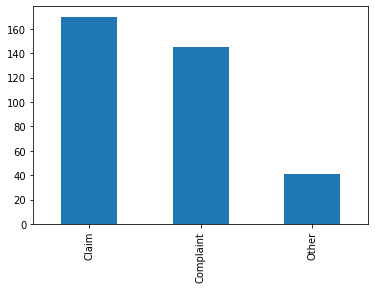

In [5]:
#Replace claim with Claim

data1['Purpose'].replace('claim','Claim',inplace=True)
df1['Purpose'].replace('claim','Claim',inplace=True)

data1['Purpose'].value_counts()
df1['Purpose'].value_counts()

data1['Purpose'].value_counts().plot(kind='bar')
df1['Purpose'].value_counts().plot(kind='bar')

<AxesSubplot:>

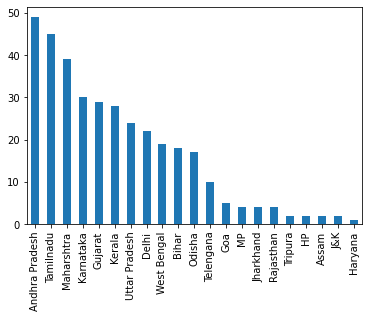

In [6]:
#Replace up with uttar pradesh

data1['State'].replace('UP','Uttar Pradesh',inplace=True)
df1['State'].replace('UP','Uttar Pradesh',inplace=True)

data1['State'].value_counts()

data1['State'].value_counts().plot(kind='bar')


In [7]:
#Finding the duplicate values

data1.describe()

data1.Claim_Value.duplicated()
df1.Claim_Value.duplicated()

data1.Claim_Value.duplicated().sum()
df1.Claim_Value.duplicated().sum()

data1.duplicated()
df1.duplicated()

data1.duplicated().sum()
df1.duplicated().sum()

data1.loc[data1.duplicated(),:]
df1.loc[data1.duplicated(),:]

data1.loc[data1.duplicated(keep='first'),:]
df1.loc[data1.duplicated(keep='first'),:]

data1.loc[data1.duplicated(keep='last'),:]
df1.loc[data1.duplicated(keep='last'),:]

data1.loc[data1.duplicated(keep=False),:]
df1.loc[data1.duplicated(keep=False),:]

data1=data1.drop_duplicates()
df1=df1.drop_duplicates()

print(data1,df1)

         Region           State   Area        City Consumer_profile  \
0    North East           Assam  Rural     Guwhati         Personal   
1          East           Delhi  Urban   New Delhi         Personal   
2          West  Andhra Pradesh  Rural   Hyderabad         Business   
3          West         Gujarat  Rural   Ahmedabad         Personal   
4    South West          Kerala  Rural       Kochi         Business   
..          ...             ...    ...         ...              ...   
351       South          Kerala  Rural       Kochi         Business   
352       South       Tamilnadu  Urban     Chennai         Personal   
353       North   Uttar Pradesh  Rural      Meerut         Personal   
354       South  Andhra Pradesh  Urban  Vijayawada         Personal   
355       North           Bihar  Urban      Purnea         Personal   

    Product_category Product_type  AC_1001_Issue  AC_1002_Issue  \
0          Household           AC              0              1   
1      Entert

In [8]:
#NA Values

data1.isnull()
df1.isnull()

data1.isnull().sum()
df1.isnull().sum()

data1.Claim_Value.describe()
df1.Claim_Value.describe()

count      322.000000
mean     11752.099379
std      11651.231761
min          0.000000
25%       4090.250000
50%       7090.500000
75%      15000.000000
max      50000.000000
Name: Claim_Value, dtype: float64

In [9]:
#Median imputation

data1.fillna(data1.Claim_Value.median(),inplace=True)
df1.fillna(data1.Claim_Value.median(),inplace=True)

data1.Claim_Value.describe()
df1.Claim_Value.describe()

data1.isnull().sum()
df1.isnull().sum()

Region              0
State               0
Area                0
City                0
Consumer_profile    0
Product_category    0
Product_type        0
AC_1001_Issue       0
AC_1002_Issue       0
AC_1003_Issue       0
TV_2001_Issue       0
TV_2002_Issue       0
TV_2003_Issue       0
Claim_Value         0
Service_Centre      0
Product_Age         0
Purchased_from      0
Call_details        0
Purpose             0
dtype: int64

In [13]:
#Applying ADASYN Technique for imbalanced dataset

from imblearn.over_sampling import ADASYN

from collections import Counter

data2=pd.get_dummies(data1)
df2=pd.get_dummies(df1)

X=data2.iloc[:,:-1].values

Y=data2.iloc[:,10:11].values

print('Shape of Future Matrix:',X.shape)

print('Shape of Target Vector:',Y.shape)

ada=ADASYN(sampling_strategy='minority',random_state=42,n_neighbors=5)

X_res, y_res = ada.fit_resample(X,Y)

print('Oversampled Target Variable Distribution:',Counter(y_res))

data3=np.column_stack((X_res,y_res))

df=pd.DataFrame(data3)
df.to_csv('encoded.csv')

Shape of Future Matrix: (356, 80)
Shape of Target Vector: (356, 1)
Oversampled Target Variable Distribution: Counter({0: 321, 1: 317})


In [20]:
#Model building- Random forest

X=df.iloc[:,:-1]

Y=df.iloc[:,80:81]

from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.30)

from sklearn.neighbors import KNeighborsClassifier as KNC

neigh = KNC(n_neighbors= 1)

neigh.fit(X_train,Y_train)

y_pred=neigh.predict(X_test)

from sklearn.metrics import classification_report,confusion_matrix

from sklearn import metrics

print(confusion_matrix(Y_test,y_pred))

print("Accuracy:",metrics.accuracy_score(Y_test,y_pred))

print(classification_report(Y_test,y_pred))

#k=5

X=df.iloc[:,:-1]

Y =df.iloc[:,80:81]

from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.30)

from sklearn.neighbors import KNeighborsClassifier as KNC

neigh = KNC(n_neighbors= 5)

neigh.fit(X_train,Y_train)

y_pred=neigh.predict(X_test)

from sklearn.metrics import classification_report,confusion_matrix

from sklearn import metrics

print(confusion_matrix(Y_test,y_pred))

print("Accuracy:",metrics.accuracy_score(Y_test,y_pred))

print(classification_report(Y_test,y_pred))

#Random forest

X=df.iloc[:,:-1]

Y=df.iloc[:,80:81]

from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.30)

from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics

rf=RandomForestClassifier()

rf.fit(X_train,Y_train)

predictions=rf.predict(X_test)

cm= metrics.confusion_matrix(Y_test,predictions)

print(cm)

print("Accuracy:",metrics.accuracy_score(Y_test,predictions))

print(classification_report(Y_test,predictions))



C:\Users\shridhar\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\shridhar\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
<ipython-input-20-aad3d195010c>:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,Y_train)


[[79 17]
 [ 9 87]]
Accuracy: 0.8645833333333334
              precision    recall  f1-score   support

         0.0       0.90      0.82      0.86        96
         1.0       0.84      0.91      0.87        96

    accuracy                           0.86       192
   macro avg       0.87      0.86      0.86       192
weighted avg       0.87      0.86      0.86       192

[[73 22]
 [18 79]]
Accuracy: 0.7916666666666666
              precision    recall  f1-score   support

         0.0       0.80      0.77      0.78        95
         1.0       0.78      0.81      0.80        97

    accuracy                           0.79       192
   macro avg       0.79      0.79      0.79       192
weighted avg       0.79      0.79      0.79       192

[[98  0]
 [ 0 94]]
Accuracy: 1.0
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        98
         1.0       1.00      1.00      1.00        94

    accuracy                           1.00       192

In [32]:
X_test.shape
df2.shape

(331, 80)

In [33]:
predictions=rf.predict(df2)

In [35]:
predictions

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1.,
       0., 1., 0., 0., 0.